1- Importing Libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import random

2- Load and Preprocess Dataset.

In [6]:
dataset = pd.read_csv("Housing.csv")

features = dataset.drop(columns=['price'])
target = dataset['price']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

numeric_features_train = features_train.select_dtypes(include=[np.number])
numeric_features_test = features_test.select_dtypes(include=[np.number])

features_train_normalized = (numeric_features_train - numeric_features_train.mean()) / numeric_features_train.std()
features_test_normalized = (numeric_features_test - numeric_features_train.mean()) / numeric_features_train.std()

target_mean = target_train.mean()
target_std = target_train.std()


3- Implement the Simple Trick.

In [7]:
class SimpleTrickLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.price_per_room = 0
        self.base_price = 0

    def fit(self, X, y):
        num_samples = X.shape[0]
        
        for _ in range(self.iterations):
            for i in range(num_samples):
                num_rooms = X[i, 0]  
                price = y[i]

                self.price_per_room, self.base_price = self.simple_trick(
                    self.base_price, self.price_per_room, num_rooms, price
                )

    def simple_trick(self, base_price, price_per_room, num_rooms, price):
        small_random_1 = random.random() * 0.1
        small_random_2 = random.random() * 0.1
        
        predicted_price = base_price + price_per_room * num_rooms

        if price > predicted_price and num_rooms > 0:
            price_per_room += small_random_1
            base_price += small_random_2
        elif price > predicted_price and num_rooms < 0:
            price_per_room -= small_random_1
            base_price += small_random_2
        elif price < predicted_price and num_rooms > 0:
            price_per_room -= small_random_1
            base_price -= small_random_2
        elif price < predicted_price and num_rooms < 0:
            price_per_room += small_random_1
            base_price -= small_random_2

        return price_per_room, base_price

    def predict(self, X):
        return self.base_price + self.price_per_room * X[:, 0]


4- Train and Evaluate the Simple Trick Model.

In [ ]:
X_train = features_train_normalized.values  
X_test = features_test_normalized.values   
y_train = ((target_train - target_mean) / target_std).values  

model = SimpleTrickLinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)


In [9]:
y_pred_normalized = model.predict(X_test)

y_pred = y_pred_normalized * target_std + target_mean

rmse = np.sqrt(mean_squared_error(target_test, y_pred))
r2 = r2_score(target_test, y_pred)

print("Simple Trick Linear Regression RMSE:", rmse)
print("Simple Trick Linear Regression R^2:", r2)


Simple Trick Linear Regression RMSE: 1856631.816783547
Simple Trick Linear Regression R^2: 0.31802674904448336


5- Visualize Results.

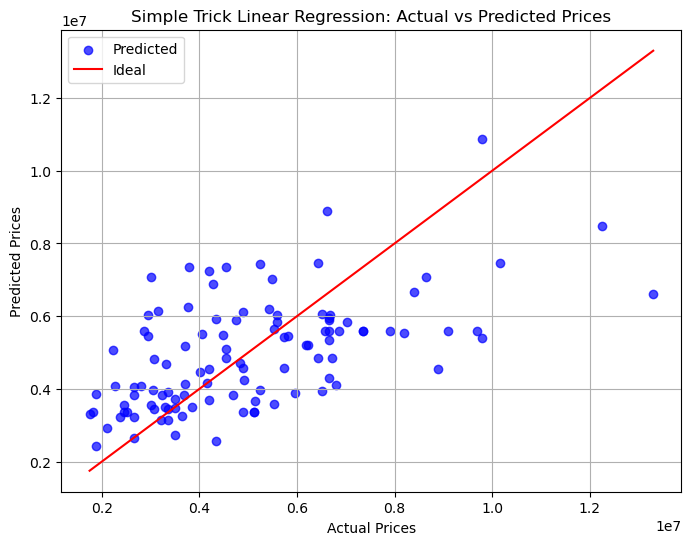

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(target_test, y_pred, color='blue', label='Predicted', alpha=0.7)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', label='Ideal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Simple Trick Linear Regression: Actual vs Predicted Prices")
plt.legend()
plt.grid()
plt.show()
